<div class = "alert alert-block block alert-info">
    <h1> Prevent the Stent  </h1>
</div>

In [1]:
#imports
import pandas as pd
import numpy as np
import acquire as a
import prepare as p
import explore as e
import model_functions as m 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import warnings
warnings.filterwarnings('ignore')


<div class = "alert alert-block block alert-info">
    <b> Acquire  </b>
</div>

The data is from heart.csv that was downloaded from kaggle.com.  The full url can be found in the readme.
It consisted of 14 columns and 303 rows.  Each row is a patient and each column is a health measurement, sign or symptom.

In [2]:
# pulling data into notebook
df = a.get_heart()

<div class = "alert alert-block block alert-info">
    <b> Prepare  </b>
</div>

- There were only 2 null values so the rows containing nulls were dropped.
- Columns were renamed to make them more readable.
- Did not remove outliers
- Integer values for categorical variables were replaced with the corresponding sting value from the data dictionary for more efficient exploratory analysis.
- Data was then split into train, validate and test sets

In [3]:
#renaming columns to make them more readable
df = p.rename_cols(df)

# replacing integer values with their corresponding strings for discrete variables
df = p.replace_cat_values(df)

# split to train, validate and test
train, val, test = p.split_data(df, 'high_risk_of_mi')

<div class = "alert alert-block block alert-info">
    <b> Explore </b>
</div>

Inital Questions:

- Does higher resting blood pressure lead to higher risk of heart attack?
- Does type of chest pain relate to st_slope?
- How strongly is cholesterol correlated with high risk?
- Is oldpeak related to high risk?  What is oldpeak?
- st_slope to high risk

- - -

#### 1) Is the slope of st segment related to high risk?


st_slope,downsloping,flat,unsloping
high_risk_of_mi,,,
0,27,57,8
1,69,33,7


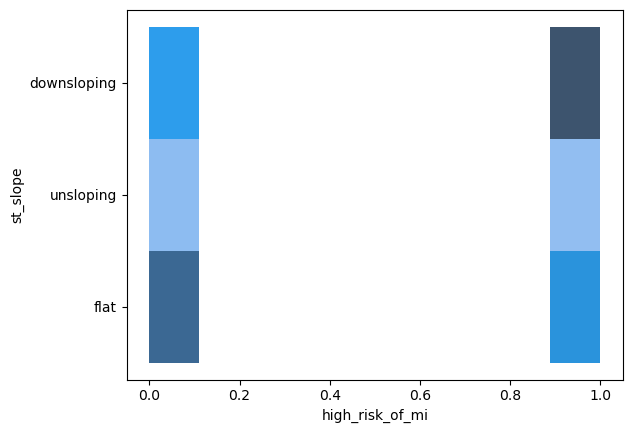

In [4]:
# Plotting histplot for visual and crosstab for values
sns.histplot(train, x= train.high_risk_of_mi, y= train.st_slope)
pd.crosstab(train.high_risk_of_mi, train.st_slope)

Ho = There is no correlation of slope type with higher risk

Ha = There is a correlation

In [5]:
# Performing chi2 test
e.chi_square_test(train.high_risk_of_mi, train.st_slope)

Reject the null hypothesis


#### 2) Does type of chest pain relate to st_slope?

<AxesSubplot:xlabel='chest_pain_type', ylabel='st_slope'>

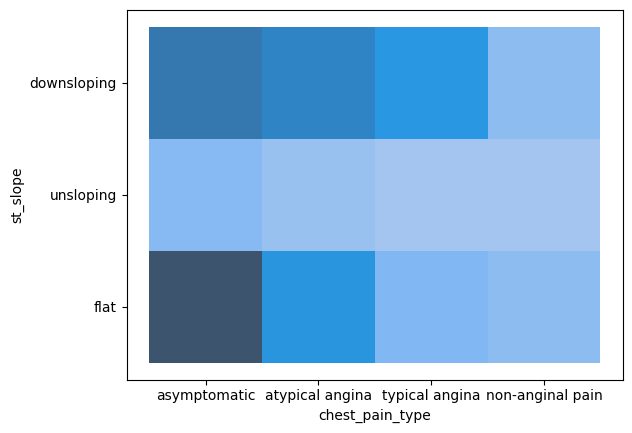

In [6]:
#plotting visual
sns.histplot(train, x= train.chest_pain_type, y= train.st_slope)

#### 3) Is oldpeak related to high risk?  What is oldpeak?

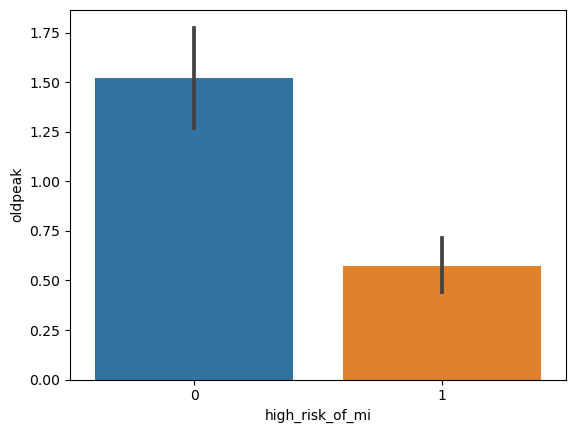

In [7]:
#plotting visual
e.bar_chart(train, 'high_risk_of_mi', 'oldpeak', title= None)

There is a significant correlation between having higher values for oldpeak and having lesser risk of heart attack.

#### 4) How strongly is cholesterol correlated with greater risk?

<AxesSubplot:xlabel='high_risk_of_mi', ylabel='cholesterol'>

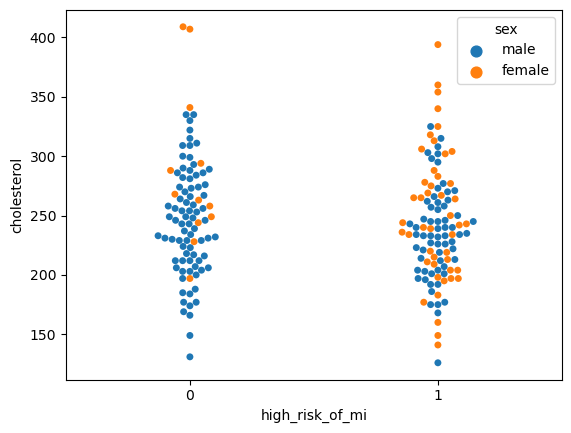

In [8]:
#plotting visual
sns.swarmplot(data= train, x= train['high_risk_of_mi'], y= train['cholesterol'], hue= train['sex'])

In [9]:
# Performing one sample t test
sample = train[train.high_risk_of_mi == 1].cholesterol
overall_mean = train.cholesterol.mean()

stats.ttest_1samp(sample, overall_mean)

Ttest_1sampResult(statistic=-0.8199774924421662, pvalue=0.4140349487916596)

After visual analysis and stat testing there is no correlation between cholesterol and heart attack risk.  This is most certainly due to the small sample size of 301 patients as this does not align with medical science.

<div class = "alert alert-block block alert-info">
    <b> Exploration Summary  </b>
</div>

<div class = "alert alert-block block alert-info">
    <b> Modeling  </b>
</div>

In [10]:
#Preparing data for modeling and splitting into train, validate, and test sets
df = m.df_classification_ready(df, 'sex_female')
train, val, test = p.split_data(df, 'high_risk_of_mi')

# Seperating target variable for making predictions and evaluating models
X_Train, y_Train, X_val, y_val, X_test, y_test = m.isolate_target(train, val, test, 'high_risk_of_mi')

In [11]:
# Decision Tree
m.get_decision_tree_multiple(X_Train, y_Train, X_val, y_val)

,min_samples_per_leaf,max_depth,train_recall,validate_recall,difference
0,1,2,0.788991,0.857143,-0.068152
16,3,2,0.788991,0.857143,-0.068152
32,5,2,0.788991,0.857143,-0.068152
40,6,2,0.788991,0.857143,-0.068152
7,1,9,1.000000,0.857143,0.142857
8,2,2,0.788991,0.857143,-0.068152
24,4,2,0.788991,0.857143,-0.068152
1,1,3,0.954128,0.821429,0.132700
26,4,4,0.935780,0.821429,0.114351
25,4,3,0.935780,0.821429,0.114351


In [12]:
# Random Forest
m.get_random_forest_multiple(X_Train, y_Train, X_val, y_val)

,min_samples_per_leaf,max_depth,train_recall,validate_recall,difference
36,5,6,0.917431,0.928571,-0.011140
53,7,7,0.880734,0.928571,-0.047837
1,1,3,0.899083,0.928571,-0.029489
37,5,7,0.935780,0.928571,0.007208
38,5,8,0.944954,0.928571,0.016383
39,5,9,0.944954,0.928571,0.016383
41,6,3,0.889908,0.928571,-0.038663
43,6,5,0.889908,0.928571,-0.038663
44,6,6,0.889908,0.928571,-0.038663
45,6,7,0.889908,0.928571,-0.038663


Random Forest with 5 minimum samples per leaf and 7 max depth had the best overall performance.

In [13]:
# KNN
m.get_knn_multiple(X_Train, y_Train, X_val, y_val)

,min_samples_per_leaf,max_depth,train_recall,validate_recall,difference
21,3,7,0.825688,0.785714,0.039974
13,2,7,0.825688,0.785714,0.039974
53,7,7,0.825688,0.785714,0.039974
19,3,5,0.853211,0.785714,0.067497
59,8,5,0.853211,0.785714,0.067497
27,4,5,0.853211,0.785714,0.067497
29,4,7,0.825688,0.785714,0.039974
61,8,7,0.825688,0.785714,0.039974
51,7,5,0.853211,0.785714,0.067497
11,2,5,0.853211,0.785714,0.067497


<div class = "alert alert-block block alert-info">
    <p> The best performing model overall was a random forest with minimum 5 samples per leaf and a max depth of 7. This model's recall values are represented below:  </p>
</div>

In [14]:
rf = m.get_random_forest_multiple(X_Train, y_Train, X_val, y_val)
best_model = rf.loc[rf.index == 37]
best_model

,min_samples_per_leaf,max_depth,train_recall,validate_recall,difference
37,5,7,0.93578,0.928571,0.007208


#### Test Model
Using best model on Test set to make predictions

In [15]:
test_predictions = m.test_predictions(X_test, y_test)

Recall value of test predicitions: 0.8889


<div class = "alert alert-block block alert-info">
    <b> Modeling Wrap </b>
</div>

Random Forest performed signifcanly better than the other two algorithms and the optimal hyperparameters were 5 min samples per leaf and max depth of 7.

<div class = "alert alert-block block alert-info">
    <b> Conclusion  </b>
</div>

This project proves the concept that machine learning can be used to classify patients into heart attack risk categories.

<div class = "alert alert-block block alert-info">
    <b> Recommendations  </b>
</div>

This is not a diagnostic tool, but a time-saving measure as it provides very fast identification of high-risk patients without the time-consuming manual review of records.  Patients identified as high risk can be sent for further review by a healthcare provider and be scheduled for follow-ups and offered nutrition guidance.

<div class = "alert alert-block block alert-info">
    <b> Next Steps  </b>
</div>

With more time I would gather more data to have a much larger sample size for more reliable correlation tests and to fine-tune the models.